In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
plt.rcParams["font.family"] = "Apple SD Gothic Neo"
plt.rcParams["axes.unicode_minus"] = False

In [33]:
# warnings : 함수를 현재는 지원하는 나중에 삭제 시 경고 메세지가 발생
import warnings
warnings.simplefilter("ignore") # 무시할게

In [12]:
df = pd.read_csv("./data/202306_202306_연령별인구현황_월간.csv",encoding="ms949",thousands=",")
df.head(1)

,행정구역,2023년06월_계_총인구수,2023년06월_계_연령구간인구수,2023년06월_계_0~9세,2023년06월_계_10~19세,2023년06월_계_20~29세,2023년06월_계_30~39세,2023년06월_계_40~49세,2023년06월_계_50~59세,2023년06월_계_60~69세,2023년06월_계_70~79세,2023년06월_계_80~89세,2023년06월_계_90~99세,2023년06월_계_100세 이상
0,서울특별시 (1100000000),9414093,9414093,528601,742606,1376043,1426858,1433451,1490305,1312500,725930,332435,43869,1495


#### 데이터 탐색

In [13]:
df.info()   # ,를 빼고 데이터를 가져오면 int로 타입이 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   행정구역                3877 non-null   object
 1   2023년06월_계_총인구수     3877 non-null   int64 
 2   2023년06월_계_연령구간인구수  3877 non-null   int64 
 3   2023년06월_계_0~9세     3877 non-null   int64 
 4   2023년06월_계_10~19세   3877 non-null   int64 
 5   2023년06월_계_20~29세   3877 non-null   int64 
 6   2023년06월_계_30~39세   3877 non-null   int64 
 7   2023년06월_계_40~49세   3877 non-null   int64 
 8   2023년06월_계_50~59세   3877 non-null   int64 
 9   2023년06월_계_60~69세   3877 non-null   int64 
 10  2023년06월_계_70~79세   3877 non-null   int64 
 11  2023년06월_계_80~89세   3877 non-null   int64 
 12  2023년06월_계_90~99세   3877 non-null   int64 
 13  2023년06월_계_100세 이상  3877 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 424.2+ KB


In [15]:
# 기술요약통계

df.describe(include=object)

,행정구역
count,3877
unique,3877
top,서울특별시 (1100000000)
freq,1


#### 데이터 전처리

In [18]:
# 2023년06월_계_총인구수 => 총인구수
# 모든 컬럼명에 "2023년06월_계_" 제거
df.columns = df.columns.str.replace("2023년06월_계_","")

In [19]:
df.columns

Index(['행정구역', '총인구수', '연령구간인구수', '0~9세', '10~19세', '20~29세', '30~39세',
       '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'],
      dtype='object')

In [20]:
# 컬럼 제거 - 총인구수, 연령구간인구수
# df.drop([삭제할컬럼명 나열],axis=1,inplace=True)

df.drop(columns=['총인구수', '연령구간인구수'],inplace=True)

In [22]:
df.head(2)

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,서울특별시 (1100000000),528601,742606,1376043,1426858,1433451,1490305,1312500,725930,332435,43869,1495
1,서울특별시 종로구 (1111000000),6110,10009,21836,19367,19459,24025,20556,11446,6619,934,36


#### 특정 동 데이터 탐색

In [26]:
df[df["행정구역"] == "서울특별시 종로구 평창동(1111056000)"]

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
6,서울특별시 종로구 평창동(1111056000),1037,1525,2103,2080,2506,3159,2748,1360,815,133,10


In [27]:
df.loc[6]

행정구역       서울특별시 종로구 평창동(1111056000)
0~9세                            1037
10~19세                          1525
20~29세                          2103
30~39세                          2080
40~49세                          2506
50~59세                          3159
60~69세                          2748
70~79세                          1360
80~89세                           815
90~99세                           133
100세 이상                           10
Name: 6, dtype: object

In [35]:
# contains()

pyeongchang = df[df["행정구역"].str.contains("평창동")]   # True,False 로 뜨는것을 df[]로 다시 감싸면 찾아줌
pyeongchang

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
6,서울특별시 종로구 평창동(1111056000),1037,1525,2103,2080,2506,3159,2748,1360,815,133,10


In [36]:
pyeongchang.drop(columns=["행정구역"],inplace=True)

In [43]:
# 행열 바꾸기 transpose() / T

pyeongchang = pyeongchang.T
pyeongchang

,6
0~9세,1037
10~19세,1525
20~29세,2103
30~39세,2080
40~49세,2506
50~59세,3159
60~69세,2748
70~79세,1360
80~89세,815
90~99세,133


In [44]:
pyeongchang.columns = ["인구수"]

In [45]:
pyeongchang

,인구수
0~9세,1037
10~19세,1525
20~29세,2103
30~39세,2080
40~49세,2506
50~59세,3159
60~69세,2748
70~79세,1360
80~89세,815
90~99세,133


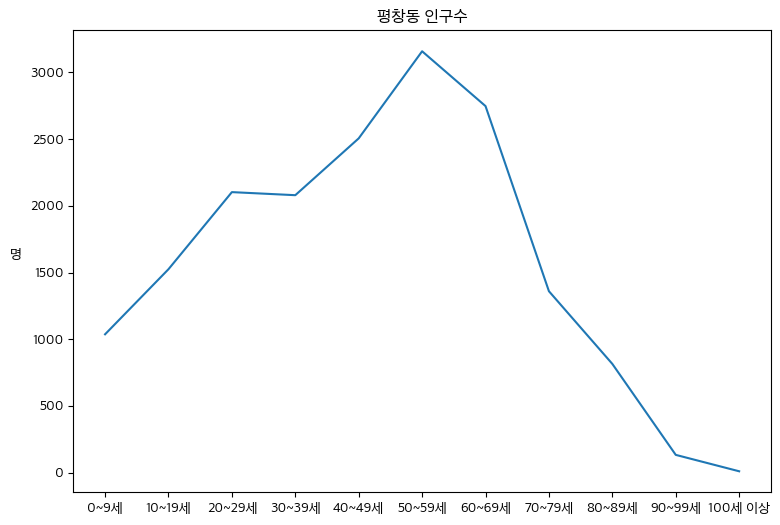

In [57]:
# 평창동 선차트
# 평창동 인구수

plt.figure(figsize=(9,6))
plt.title("평창동 인구수")
plt.ylabel("명",rotation=0,labelpad=10)
# plt.plot(pyeongchang["인구수"])
g = plt.plot(pyeongchang.index,pyeongchang["인구수"])

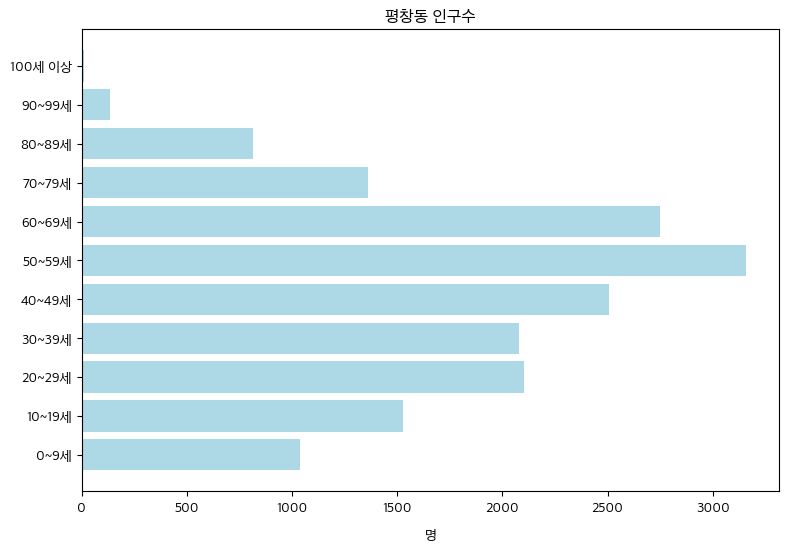

In [64]:
plt.figure(figsize=(9,6))
plt.title("평창동 인구수")
plt.xlabel("명",rotation=0,labelpad=10)
g = plt.barh(pyeongchang.index,pyeongchang["인구수"],color="lightblue")

In [68]:
## 갈매동
galmae = df[df["행정구역"].str.contains("갈매동")]
galmae
galmae.drop(columns=["행정구역"],inplace=True)
galmae

,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
1586,3737,2782,2760,4504,6465,4016,3642,1602,531,75,4


In [69]:
galmae = galmae.T
galmae

,1586
0~9세,3737
10~19세,2782
20~29세,2760
30~39세,4504
40~49세,6465
50~59세,4016
60~69세,3642
70~79세,1602
80~89세,531
90~99세,75


In [70]:
galmae.columns = ["인구수"]
galmae

,인구수
0~9세,3737
10~19세,2782
20~29세,2760
30~39세,4504
40~49세,6465
50~59세,4016
60~69세,3642
70~79세,1602
80~89세,531
90~99세,75


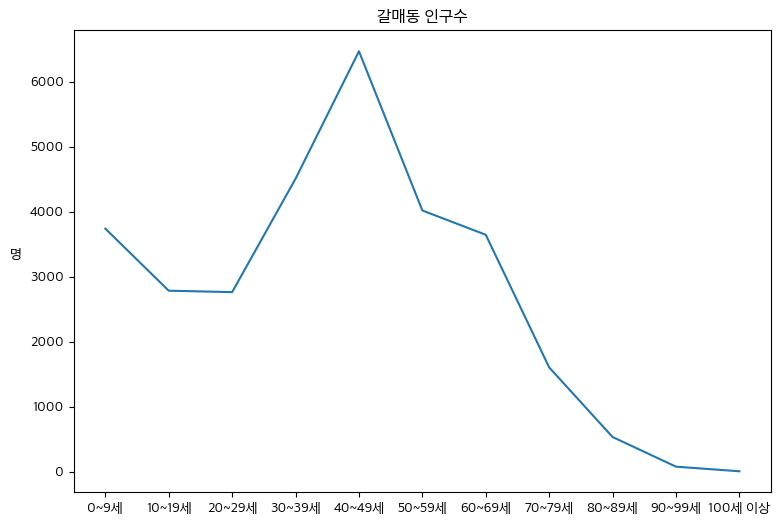

In [71]:
plt.figure(figsize=(9,6))
plt.title("갈매동 인구수")
plt.ylabel("명",rotation=0,labelpad=10)
# plt.plot(galmae["인구수"])
g = plt.plot(galmae.index,galmae["인구수"])

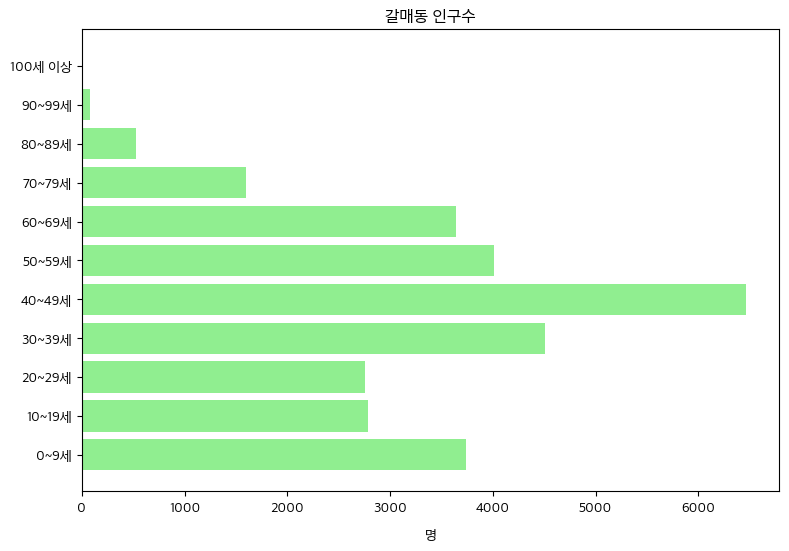

In [73]:
plt.figure(figsize=(9,6))
plt.title("갈매동 인구수")
plt.xlabel("명",rotation=0,labelpad=10)
g = plt.barh(galmae.index,galmae["인구수"],color="lightgreen")

In [101]:
dong = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)를 입력해 주세요")

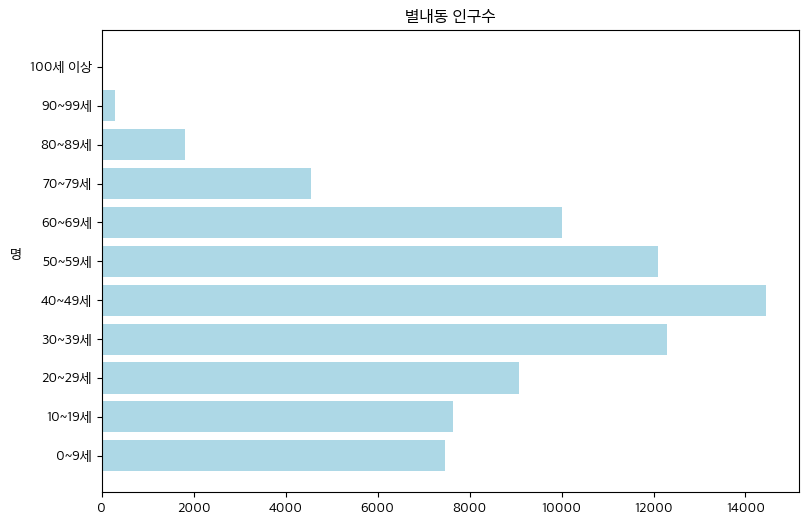

In [102]:
# contains()
dongne = df[df["행정구역"].str.contains(dong)]

dongne.drop(columns=["행정구역"],inplace=True)

# 행열바꿈
dongne = dongne.T

# 컬럼명 변경
dongne.columns = ["인구수"]

# 차트작성
plt.figure(figsize=(9,6))
plt.title(dong + " 인구수")
plt.ylabel("명",rotation=0,labelpad=10)
g = plt.barh(dongne.index,dongne["인구수"],color="lightblue")